In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from ucimlrepo import fetch_ucirepo

In [2]:
heart_disease = fetch_ucirepo(id = 45)

In [7]:
data = heart_disease.data.features
data.to_csv("Heart_disease.csv", index = None)

In [15]:
data.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0


In [16]:

cholesterol_data = data['chol'] 
# Generate sample means
n_samples = 1000 
sample_size = 50  

sample_means = [
    np.mean(np.random.choice(cholesterol_data.dropna(), sample_size, replace=True))
    for _ in range(n_samples)
]


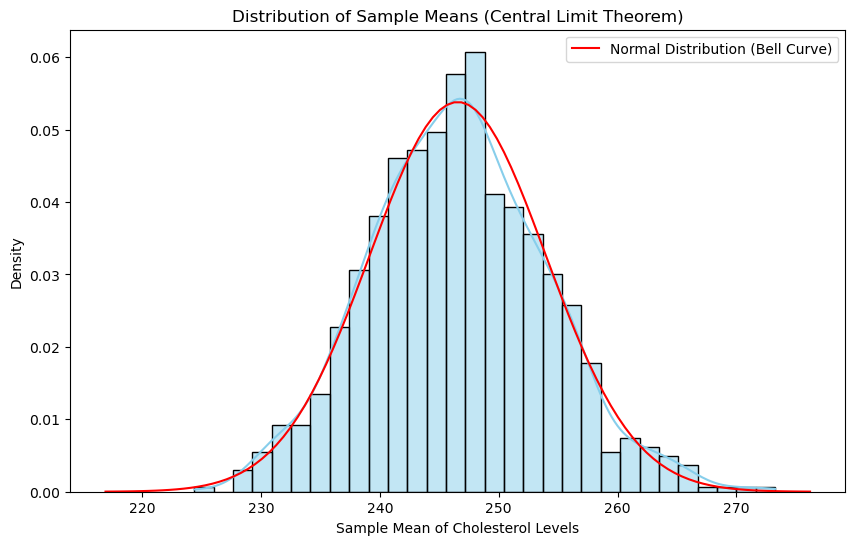

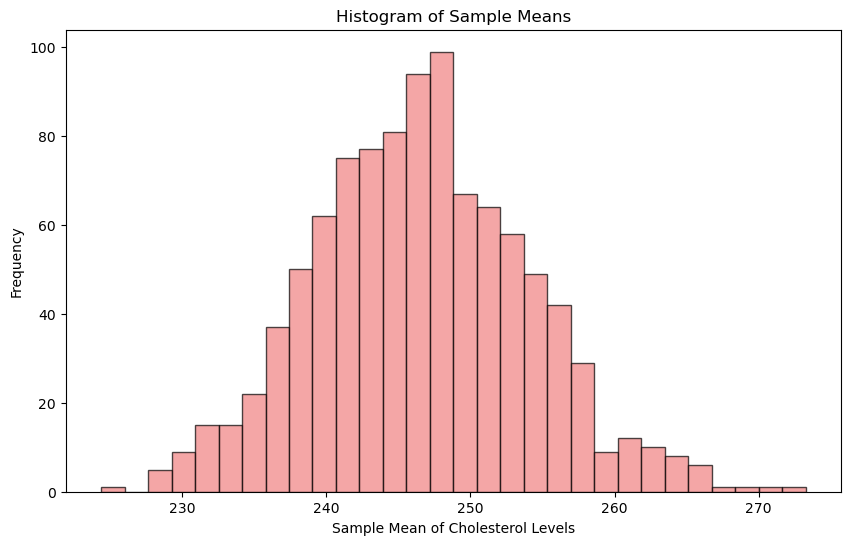

In [17]:
# Plot histogram with density curve
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, stat="density", bins=30, color="skyblue")
plt.title("Distribution of Sample Means (Central Limit Theorem)")
plt.xlabel("Sample Mean of Cholesterol Levels")
plt.ylabel("Density")

# Overlay a normal distribution for comparison
mean_sample_means = np.mean(sample_means)
std_sample_means = np.std(sample_means)
x = np.linspace(mean_sample_means - 4*std_sample_means, mean_sample_means + 4*std_sample_means, 100)
plt.plot(x, norm.pdf(x, mean_sample_means, std_sample_means), 'r', label="Normal Distribution (Bell Curve)")
plt.legend()
plt.show()

# Display histogram without density for visual comparison
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color="lightcoral", edgecolor="black", alpha=0.7)
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean of Cholesterol Levels")
plt.ylabel("Frequency")
plt.show()


In [19]:
# Summary of sample means
sample_means_mean = np.mean(sample_means)
sample_means_std = np.std(sample_means)
sample_means_skew = pd.Series(sample_means).skew()
sample_means_kurtosis = pd.Series(sample_means).kurtosis()

summary_table = pd.DataFrame({
    "Mean of Sample Means": [sample_means_mean],
    "Standard Deviation of Sample Means": [sample_means_std],
    "Skewness": [sample_means_skew],
    "Kurtosis": [sample_means_kurtosis]
})

summary_table


,Mean of Sample Means,Standard Deviation of Sample Means,Skewness,Kurtosis
0,246.55394,7.412791,0.18258,0.102135
